In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# "Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction"
X = data.drop(columns="Outcome",axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [5]:
y = data["Outcome"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [6]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=8)

In [7]:
knn.score(X,y)

0.78515625

In [8]:
# using train_test_split
trainX,testX, trainY, testY = train_test_split(X,y,test_size=0.8, random_state=21, stratify=y)

In [9]:
knn.fit(trainX, trainY)

KNeighborsClassifier(n_neighbors=8)

In [10]:
outcome = knn.predict(testX)

In [11]:
knn.score(testX, testY)

0.7284552845528456

In [12]:
knn.score(trainX,trainY)

0.803921568627451

In [13]:
# from datacamp
X = data.drop("Glucose", axis=1).values
y = data['Glucose'].values
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [14]:
X_bmi = X[: , 3]
y.shape, X_bmi.shape

((768,), (768,))

In [15]:
X_bmi = X_bmi.reshape(-1, 1)
X_bmi.shape

(768, 1)

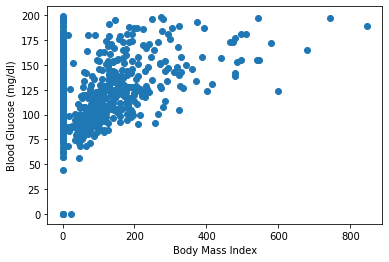

In [16]:
plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

In [17]:
# Using LInear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)

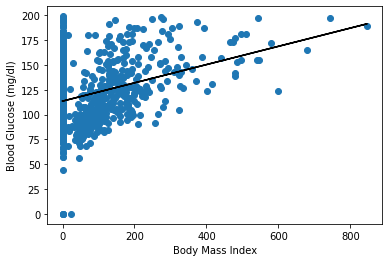

In [18]:
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions,color="black")
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

In [19]:
# Using Linear regression and train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [20]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [21]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [22]:
y_pred

array([119.91303675,  95.70325357, 104.63962314, 114.05040231,
       118.58321727, 127.12240463, 101.32326148, 109.68914522,
       114.03971568, 123.60324707, 124.99713549, 112.30131897,
       151.83921306, 120.08016862,  99.38245855, 137.26590828,
        98.92170524, 103.54780373, 124.48277405, 138.98291632,
       114.94730968, 108.01568548,  94.81640369, 104.61880645,
       115.5808436 , 129.44870188,  94.22207529, 105.35660341,
       135.62224377, 116.96796741, 132.2906766 , 152.69963123,
       149.45755335, 128.2848374 , 129.10818568, 144.78293146,
       112.09337022, 133.52916199, 113.45464867, 126.11093124,
       102.62046077, 120.53135451, 114.54168207, 137.65315875,
       107.95068535, 148.70812727, 155.6870585 ,  98.79913503,
       121.11416209, 145.42843867,  94.44116407, 150.979827  ,
       164.44641014, 133.12283053, 116.16435787, 100.29525093,
       120.43548843,  86.16602491, 110.89528052, 136.71958446,
       129.92989495, 100.63738165, 150.5625166 , 162.71

In [23]:
reg_all.score(X_test, y_test)

0.28280468810375115

In [24]:
# calculate Mean Square Error or RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

26.341459582232265

In [25]:
# K-fold cross validation - splitting data into k folds using 1 as 
# fold as test data and other k-1 folds used for training data 
# it will go on -
"""
say , k = 5 , T = test data 
NOTE : except one with T all other folds will be used for fitting or training model
k1(T) , k2,     k3 ,   k4 ,    k5
k1 ,    k2(T) , k3 ,   k4 ,    k5
k1 ,    k2,     k3(T), k4 ,    k5
k1 ,    k2,     k3 ,   k4(T) , k5
k1 ,    k2,     k3 ,   k4 ,    k5(T)
"""
from sklearn.model_selection import cross_val_score, KFold

In [26]:
kf = KFold(n_splits=6, shuffle=True, random_state=42) # 6 folds and shuffling data
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)

In [27]:
cv_results

array([0.26207548, 0.28228176, 0.41203082, 0.23785884, 0.41634629,
       0.30398869])

In [28]:
np.mean(cv_results),np.std(cv_results)

(0.3190969786734479, 0.0701532061011419)

In [29]:
np.quantile(cv_results, [0.025,0.975])

array([0.24088592, 0.41580685])

In [30]:
# regularization regression - used to penalize large coefficients which 
# help in avoid overfitting from large coeffcients.
from sklearn.linear_model import Ridge

In [31]:

score = []
for alpha in [0.1,0.1,10.0,100.0,1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    score.append(ridge.score(X_test, y_test))

score

[0.28284666232222233,
 0.28284666232222233,
 0.2853000732200003,
 0.26423984812668155,
 0.19292424694100963]

In [32]:
# Lasso similar to regularized regression
from sklearn.linear_model import Lasso

score = []
for alpha in [0.1,0.1,10.0,100.0,1000.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    score.append(lasso.score(X_test, y_test))

score

[0.28575325694826237,
 0.28575325694826237,
 0.17989838789273893,
 0.10438614467572016,
 0.04044144424693341]

In [33]:
X[:5],y[:5]

(array([[6.000e+00, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01, 6.270e-01,
         5.000e+01, 1.000e+00],
        [1.000e+00, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01, 3.510e-01,
         3.100e+01, 0.000e+00],
        [8.000e+00, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01, 6.720e-01,
         3.200e+01, 1.000e+00],
        [1.000e+00, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01, 1.670e-01,
         2.100e+01, 0.000e+00],
        [0.000e+00, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01, 2.288e+00,
         3.300e+01, 1.000e+00]]),
 array([148,  85, 183,  89, 137], dtype=int64))

In [34]:
names = data.drop("Glucose", axis=1).columns
names

Index(['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [35]:
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

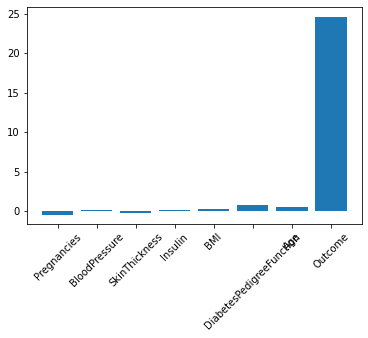

In [36]:
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

In [37]:
# How good is your model?
"""
Accuracy is not always better metrics to predict values like fraudelent in bank (about >1%)
classification metrices
class imbalance
confusion matrix
Assessing class performence
*Precision : (true positives) / (true positives + false positives)
*Recall : (true positives) / (true positives + false negatives)
F1 Score : 2 * (precision * recall) / (precision + recall)
or
F1 score is harmonic mean if precision and recall. (search on google)
confusion matrix in scikit-learn
classification report in scikit-learn
"""

from sklearn.metrics import classification_report, confusion_matrix


In [38]:
knn = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [39]:
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))
conf_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,118
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
import pprint
pprint.pprint(classification_report(y_test, y_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.00      0.00      0.00         2\n'
 '          44       0.00      0.00      0.00         0\n'
 '          56       0.00      0.00      0.00         0\n'
 '          57       0.00      0.00      0.00         0\n'
 '          61       0.00      0.00      0.00         1\n'
 '          62       0.00      0.00      0.00         1\n'
 '          65       0.00      0.00      0.00         0\n'
 '          67       0.00      0.00      0.00         0\n'
 '          68       0.00      0.00      0.00         1\n'
 '          71       0.00      0.00      0.00         1\n'
 '          72       0.00      0.00      0.00         0\n'
 '          73       0.00      0.00      0.00         2\n'
 '          74       0.00      0.00      0.00         3\n'
 '          75       0.00      0.00      0.00         1\n'
 '          76       0.00      0.00      0.00         1\n'
 '          77       0.00      0.00      0.00     

c:\Users\himan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\himan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\himan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

In [41]:
# logistic regression in scikit-learn
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
logreg.fit(X_train, y_train)


c:\Users\himan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:

y_pred = logreg.predict(X_test)

In [43]:
y_pred[:1]

array([144], dtype=int64)

In [60]:
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
y_pred_probs[0]

2.2469071173075706e-12

In [59]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

ValueError: multiclass format is not supported

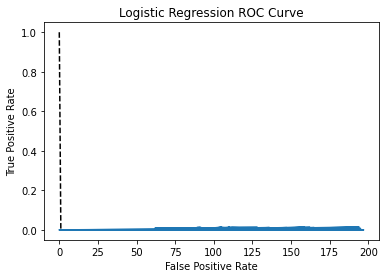

In [55]:
# plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Logistic Regression ROC Curve')
plt.show()

In [61]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

ValueError: multi_class must be in ('ovo', 'ovr')